In [1]:
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal
import pandas as pd
import numpy as np
import pywt
from scipy.interpolate import interp1d

### L05211742

In [2]:
#EEG
L05211742 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05211742.mat')

eeg_L05211742 = L05211742['xh']
eeg_L05211742 = pd.DataFrame(eeg_L05211742)
eeg_L05211742 = eeg_L05211742.stack().reset_index(drop = True).to_frame()
eeg_L05211742.columns = ['eeg']

#BIS
bis = pd.read_excel('BIS_Total1.xlsx')
bis_L05211742 = np.repeat(bis['BIS L05211742'].dropna().values, 128)

#PDOA
pdoa_L05211742 = pd.read_csv('pdoa/05211742.csv', header = None)
pdoa_L05211742.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05211742)
pdoa_resampled = scipy.signal.resample(pdoa_L05211742['pdoa'], eeg_length)
pdoa_L05211742 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [3]:
#Normalise
pdoa_L05211742['pdoa'] = (pdoa_L05211742['pdoa'] - pdoa_L05211742['pdoa'].mean()) / pdoa_L05211742['pdoa'].std()

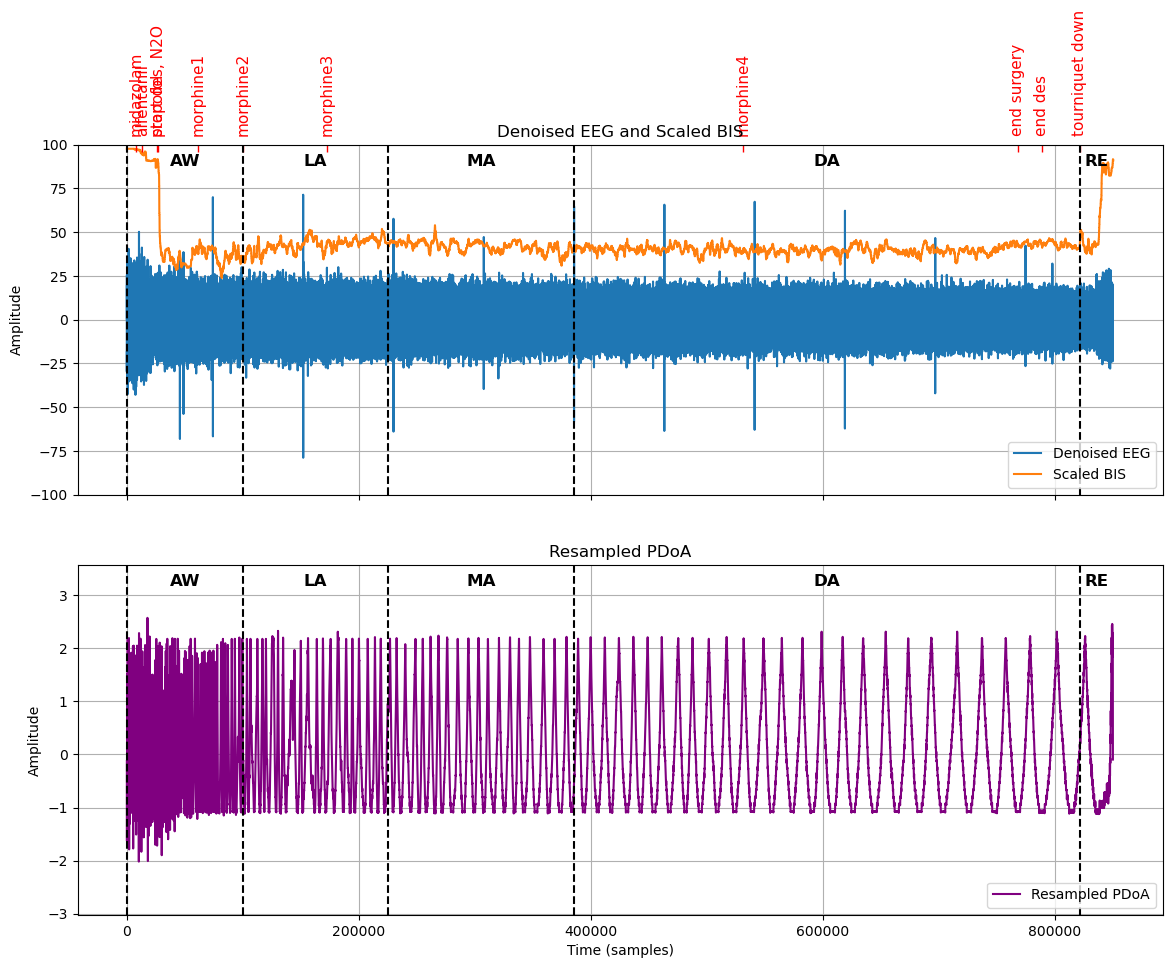

In [4]:
event_times = {
    "midazolam": "17:43:00",
    "alfentanil": "17:43:44",
    "propofol": "17:45:25",
    "start des, N2O": "17:45:30",
    "morphine1": "17:50:00",
    "morphine2": "17:55:00",
    "morphine3": "18:04:30",
    "morphine4": "18:51:10",
    "end surgery": "19:22:00",
    "end des": "19:24:40",
    "tourniquet down": "19:28:57"
}

time_seconds = {}
start_time = "17:42:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128
    
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05211742, label='Denoised EEG')
axs[0].plot(bis_L05211742, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05211742, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L05211742) - 1, np.max(pdoa_L05211742) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L05211742_label = [
    (0, 99840, 'AW'),
    (99840, 225280, 'LA'),
    (225280, 385000, 'MA'),
    (385000, 821370, 'DA'),
    (821370, eeg_length, 'RE')
]

for start, end, label in L05211742_label:
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')

    
plt.show()

### L05200708

In [5]:
#EEG
L05200708 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05200708.mat')

eeg_L05200708 = L05200708['xh']
eeg_L05200708 = pd.DataFrame(eeg_L05200708)
eeg_L05200708 = eeg_L05200708.stack().reset_index(drop=True).to_frame()
eeg_L05200708.columns = ['eeg']

#BIS
bis_L05200708 = np.repeat(bis['BIS_L05200708'].dropna().values, 128)

#PDOA
pdoa_L05200708 = pd.read_csv('pdoa/05200708.csv', header = None)
pdoa_L05200708.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05200708)
pdoa_resampled = scipy.signal.resample(pdoa_L05200708['pdoa'], eeg_length)
pdoa_L05200708 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

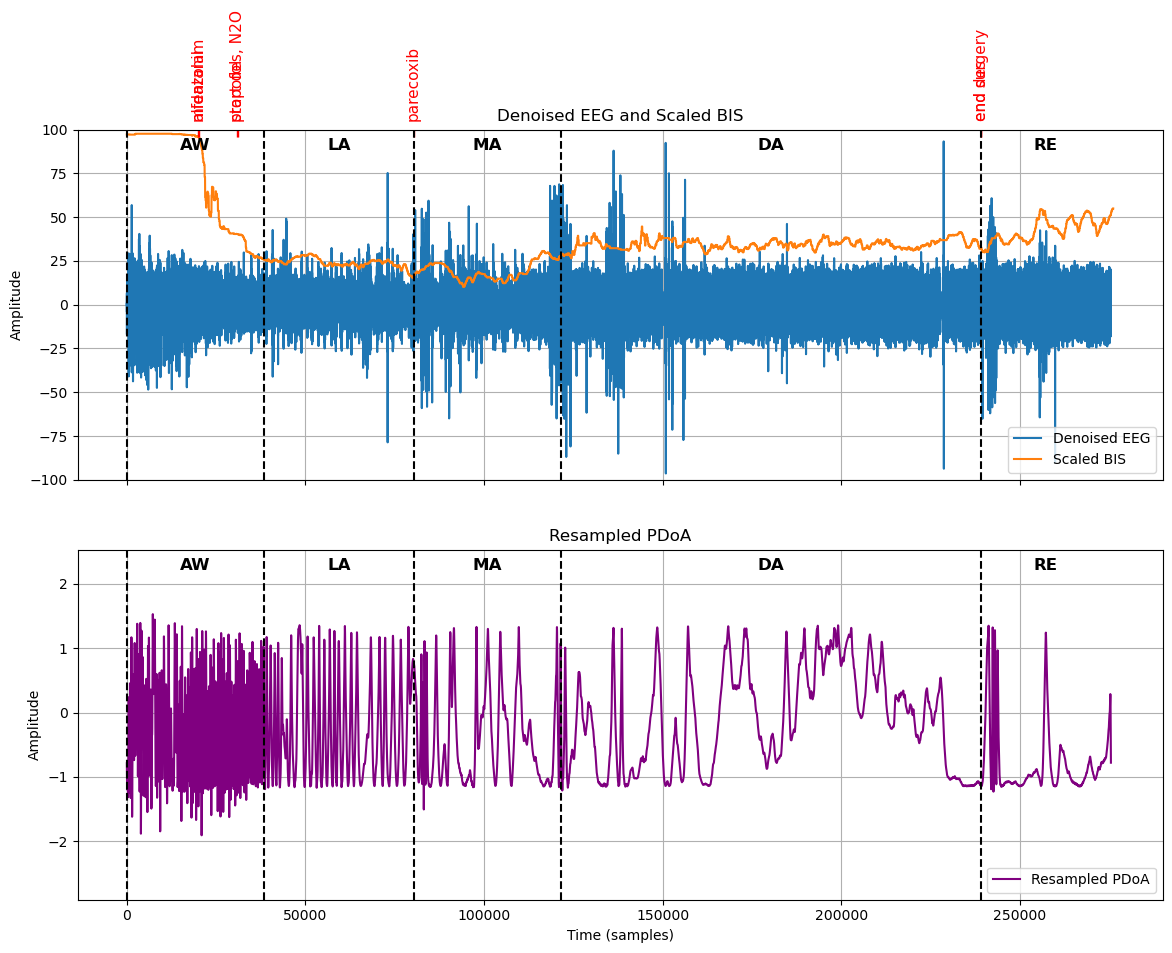

In [6]:
event_times = {
    "midazolam": "07:10:35",
    "alfentanil": "07:10:37",
    "propofol": "07:12:00",
    "start des, N2O": "07:12:02",
    "parecoxib": "07:18:27",
    "end des": "07:39:08",
    "end surgery": "07:39:08"
}

time_seconds = {}
start_time = "07:08:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05200708, label='Denoised EEG')
axs[0].plot(bis_L05200708, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05200708, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)
    
L05200708_label = [
    (0, 38400, 'AW'),
    (38400, 80256, 'LA'),
    (80256, 121600, 'MA'),
    (121600, 239104, 'DA'),
    (239104, eeg_length, 'RE')
]

for start, end, label in L05200708_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

In [7]:
def shannon_entropy(signal, num_bins=10):
    hist, _ = np.histogram(signal, bins=num_bins, density=True)
    probs = hist / np.sum(hist)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

In [8]:
# Calculate entropy for each anesthesia state
for start, end, label in L05200708_label:
    state_eeg = eeg_L05200708['eeg'][start:end]
    entropy = shannon_entropy(state_eeg)
    print(f'{label} Entropy: {entropy}')

AW Entropy: 1.643076377783415
LA Entropy: 1.1400544048032337
MA Entropy: 1.3475930081377203
DA Entropy: 1.1072650846562526
RE Entropy: 1.3714092850290411


In [9]:
def wavelet_entropy(signal, wavelet='db4', level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    energy = np.array([np.sum(c**2) for c in coeffs])
    probs = energy / np.sum(energy)
    
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

# Calculate wavelet-based entropy for each anesthesia state
for start, end, label in L05200708_label:
    state_eeg = eeg_L05200708['eeg'][start:end]
    
    # Calculate entropy for this state
    entropy_value = wavelet_entropy(state_eeg)
    print(f'{label} Wavelet-based Entropy: {entropy_value}')

AW Wavelet-based Entropy: 2.592568625171004
LA Wavelet-based Entropy: 2.6413450260913
MA Wavelet-based Entropy: 2.6091133007016216
DA Wavelet-based Entropy: 2.6216835996876435
RE Wavelet-based Entropy: 2.5352677351472903


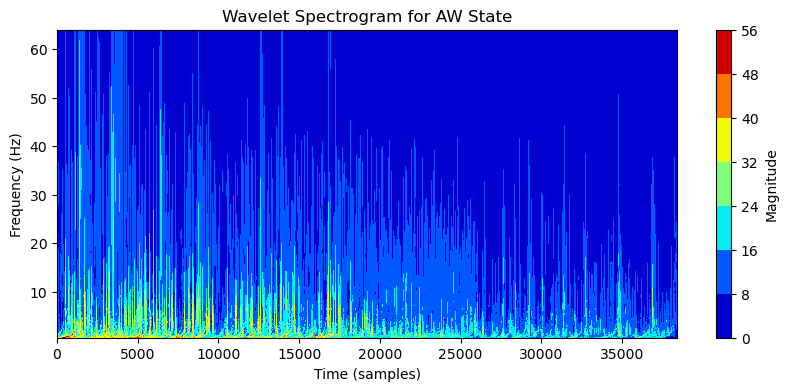

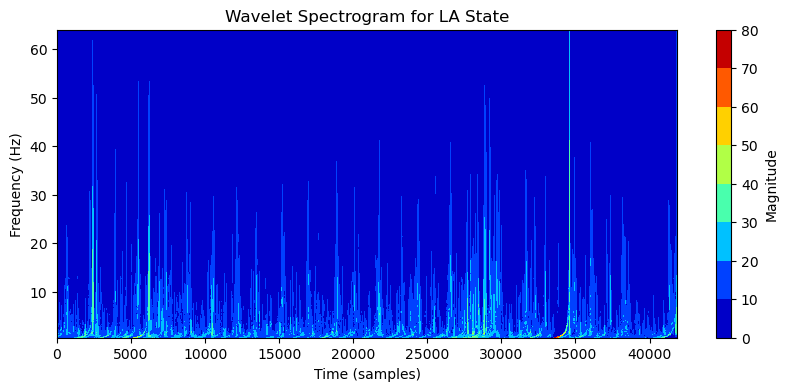

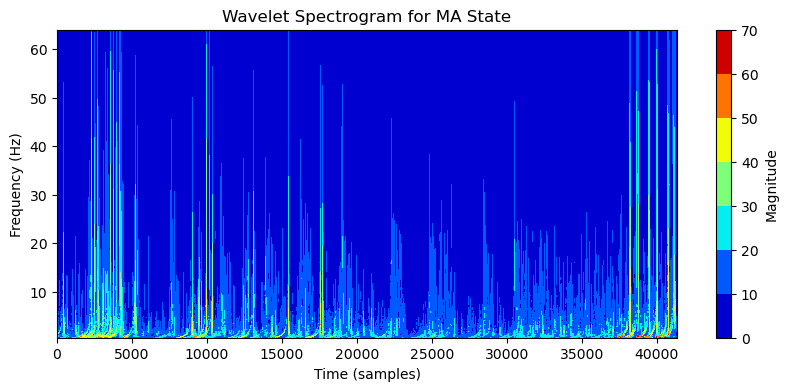

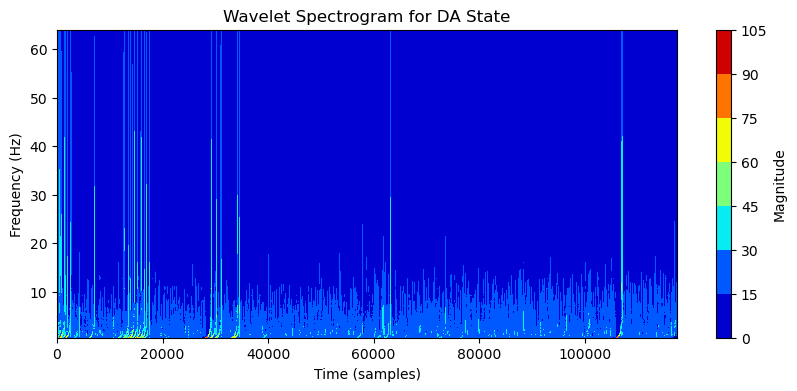

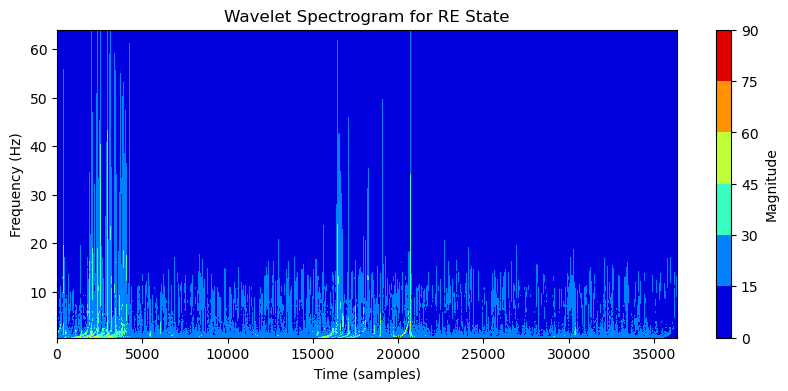

In [19]:
def plot_wavelet_spectrogram(signal, scales, wavelet='cmor', label = None):
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period = 1/128)
    plt.figure(figsize=(10, 4))
    plt.contourf(np.arange(len(signal)), frequencies, np.abs(coefficients), cmap='jet')
    plt.colorbar(label='Magnitude')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (samples)')
    plt.title(f'Wavelet Spectrogram for {label} State')
    plt.show()
    return frequencies, coefficients

scales = np.arange(1, 128)

# Plot the wavelet spectrogram for each state
for start, end, label in L05200708_label:
    state_eeg = eeg_L05200708['eeg'][start:end].values
    plot_wavelet_spectrogram(state_eeg, scales, label=label)

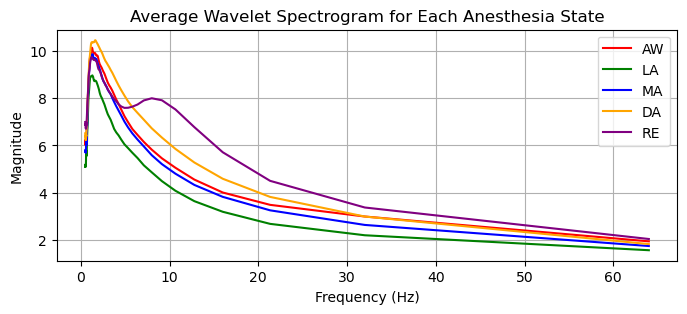

In [21]:
# Function to calculate the average wavelet spectrogram
def average_wavelet_spectrogram(signal, scales, wavelet='cmor'):
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period = 1/128)
    avg_coefficients = np.mean(np.abs(coefficients), axis=1)  # Average over time
    return frequencies, avg_coefficients


plt.figure(figsize=(8, 3))
colors = ['red', 'green', 'blue', 'orange', 'purple']

for idx, (start, end, label) in enumerate(L05200708_label):
    state_eeg = eeg_L05200708['eeg'][start:end].values
    frequencies, avg_coefficients = average_wavelet_spectrogram(state_eeg, scales)
    plt.plot(frequencies, avg_coefficients, color=colors[idx], label=label)

plt.title('Average Wavelet Spectrogram for Each Anesthesia State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

x axis (Frequency in Hz): This axis represents the frequency components of the EEG signal, ranging from very low frequencies up to 0.5 Hz. Frequencies beyond this range are not shown, as they likely have little energy or significance in the analysis of anesthesia states.

Y-Axis (Magnitude): The magnitude on this axis corresponds to the power or energy of the EEG signal at each frequency, as determined by the wavelet transform. Higher magnitudes indicate that the frequency component is more prominent or has more energy in the EEG signal.

Lower frequencies generally show higher magnitudes across all states. As frequency increases, the magnitude decreases for all states. The plot illustrates how the frequency content of the EEG signal changes with different levels of anesthesia. As the patient goes from being awake (AW) to deeper levels of anesthesia (LA, MA, DA), the energy at certain frequency bands decreases. This indicates that brain activity is slowing down and becoming more synchronized. The RE (Recovery) state shows some increase in low-frequency activity as the brain begins to return to a more active state, reflecting the process of emerging from anesthesia.

In [21]:
bis_time = np.linspace(0, len(eeg_L05200708), num=len(bis_L05200708), endpoint=False)
interp_func = interp1d(bis_time, bis_L05200708, kind='linear', fill_value='extrapolate')
bis_resampled = interp_func(np.arange(len(eeg_L05200708)))

In [22]:
average_bis = []

for start, end, label in L05200708_label:
    avg_bis = np.mean(bis_resampled[start:end])
    average_bis.append(avg_bis)
    print(f'{label} Average BIS: {avg_bis}')

AW Average BIS: 72.80295731972632
LA Average BIS: 24.06662833403054
MA Average BIS: 19.632700962521945
DA Average BIS: 34.55663424733479
RE Average BIS: 42.942299787135944


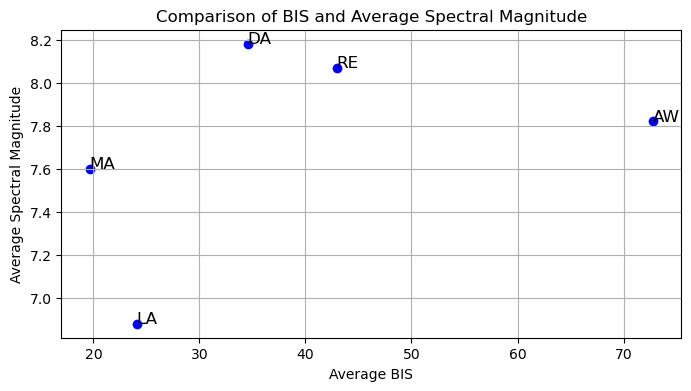

In [25]:
import matplotlib.pyplot as plt

average_spectral_magnitude = []

for start, end, label in L05200708_label:
    state_eeg = eeg_L05200708['eeg'][start:end].values
    frequencies, avg_coefficients = average_wavelet_spectrogram(state_eeg, scales)
    average_spectral_magnitude.append(np.mean(avg_coefficients))  # Averaging spectral magnitude over frequencies

# Plotting BIS vs. Spectral Magnitude
plt.figure(figsize = (8, 4))
plt.scatter(average_bis, average_spectral_magnitude, color='blue')
for i, label in enumerate([state[2] for state in L05200708_label]):
    plt.text(average_bis[i], average_spectral_magnitude[i], label, fontsize=12)

plt.xlabel('Average BIS')
plt.ylabel('Average Spectral Magnitude')
plt.title('Comparison of BIS and Average Spectral Magnitude')
plt.grid(True)
plt.show()

The chart shows no correlation between BIS and the spectral magnitude of EEG, which could suggest limitations in the BIS index

In [7]:
L05200708_bis_label = pd.DataFrame(columns=['BIS', 'Label'])

for start, end, label in L05200708_label:
    bis_values = bis_L05200708[start:end]
    labels = [label] * len(bis_values)
    bis_segment_df = pd.DataFrame({'BIS': bis_values, 'Label': labels})
    L05200708_bis_label = pd.concat([L05200708_bis_label, bis_segment_df], ignore_index=True)

L05200708_bis_label.to_csv('L05200708_label.csv', index=False)

### L05250816

In [101]:
#EEG
L05250816 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05250816.mat')

eeg_L05250816 = L05250816['xh']
eeg_L05250816 = pd.DataFrame(eeg_L05250816)
eeg_L05250816 = eeg_L05250816.stack().reset_index(drop = True).to_frame()
eeg_L05250816.columns = ['eeg']

#BIS
bis_L05250816 = np.repeat(bis['BIS_L05250816'].dropna().values, 128)

#PDOA
pdoa_L05250816 = pd.read_csv('pdoa/05250816.csv', header = None)
pdoa_L05250816.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05250816)
pdoa_resampled = scipy.signal.resample(pdoa_L05250816['pdoa'], eeg_length)
pdoa_L05250816 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

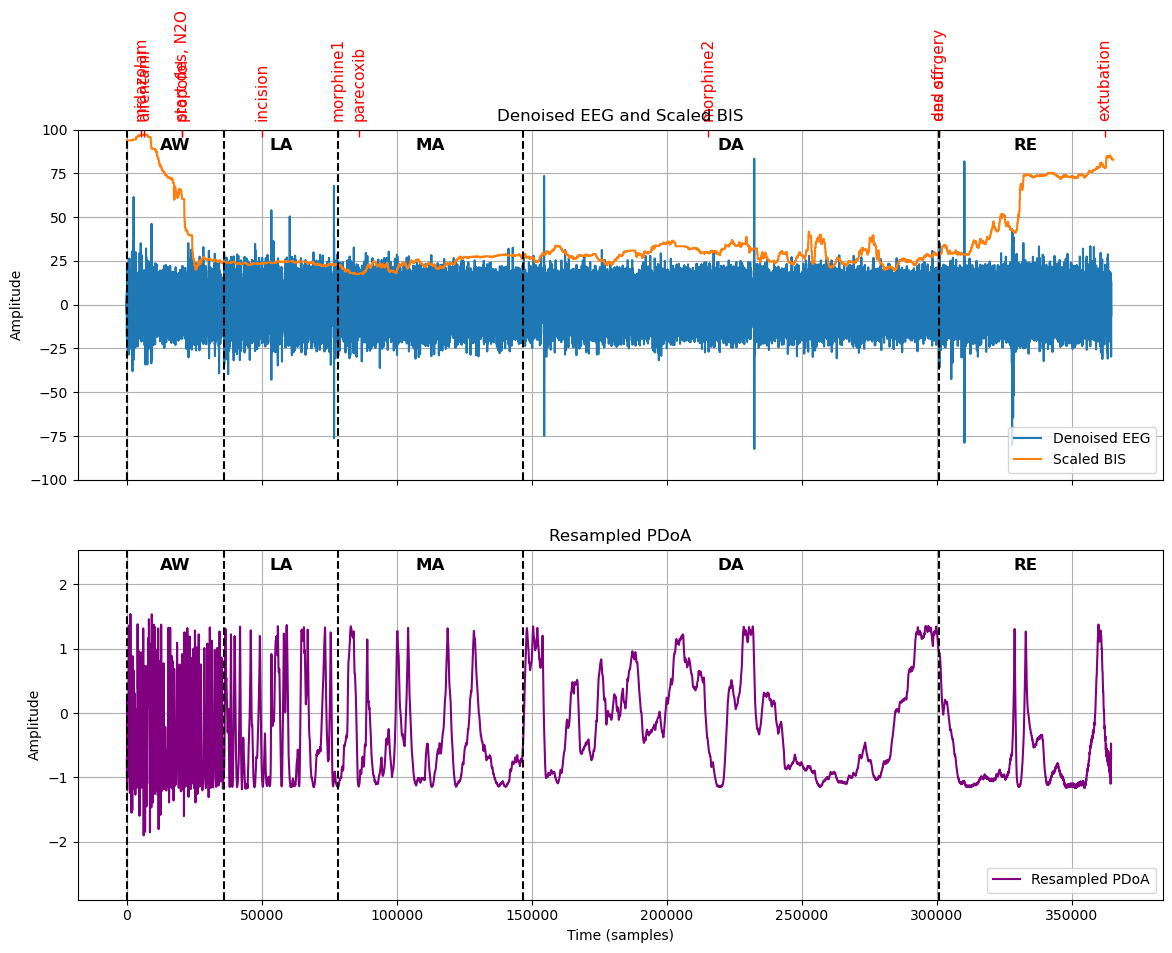

In [104]:
event_times = {
    "midazolam": "08:16:40",
    "alfentanil": "08:16:50",
    "propofol": "08:18:40",
    "start des, N2O": "08:18:40",
    "incision": "08:22:30",
    "morphine1": "08:26:11",
    "parecoxib": "08:27:13",
    "morphine2": "08:44:01",
    "des off": "08:55:11",
    "end surgery": "08:55:11",
    "extubation": "09:03:10"
}

time_seconds = {}
start_time = "08:16:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128
    
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05250816, label='Denoised EEG')
axs[0].plot(bis_L05250816, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05250816, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L05250816_label = [
    (0, 35840, 'AW'),
    (35840, 78208, 'LA'),
    (78208, 146560, 'MA'),
    (146560, 300928, 'DA'),
    (300928, eeg_length, 'RE')
]

for start, end, label in L05250816_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L05250921

In [105]:
#EEG
L05250921 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05250921.mat')

eeg_L05250921 = L05250921['xh']
eeg_L05250921 = pd.DataFrame(eeg_L05250921)
eeg_L05250921 = eeg_L05250921.stack().reset_index(drop = True).to_frame()
eeg_L05250921.columns = ['eeg']

#BIS
bis_L05250921 = np.repeat(bis['BIS L05250921'].dropna().values, 128)

#PDOA
pdoa_L05250921 = pd.read_csv('pdoa/05250921.csv', header = None)
pdoa_L05250921.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05250921)
pdoa_resampled = scipy.signal.resample(pdoa_L05250921['pdoa'], eeg_length)
pdoa_L05250921 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [106]:
#Normalise
pdoa_L05250921['pdoa'] = (pdoa_L05250921['pdoa'] - pdoa_L05250921['pdoa'].mean()) / pdoa_L05250921['pdoa'].std()

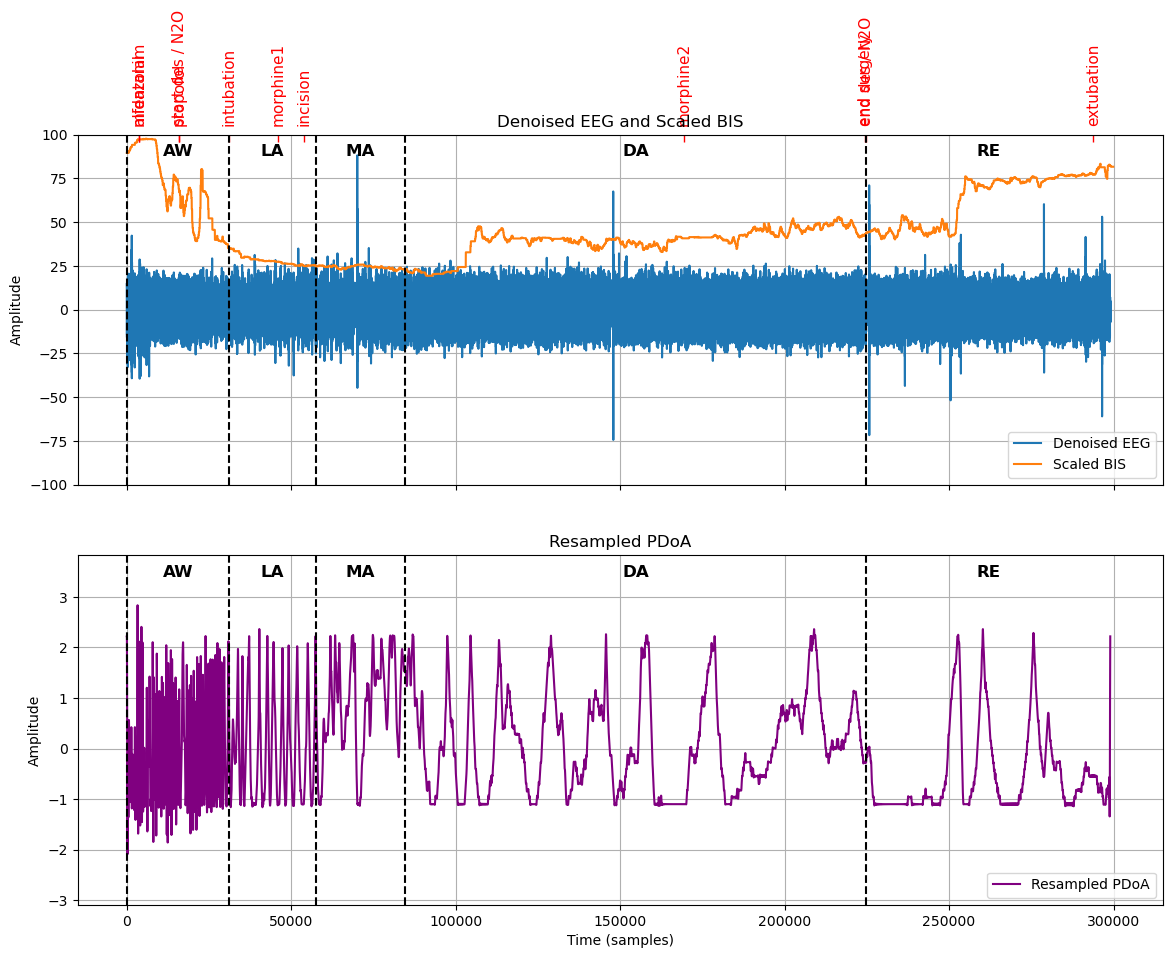

In [110]:
event_times = {
    "midazolam": "09:21:30",
    "alfentanil": "09:21:30",
    "propofol": "09:23:05",
    "start des / N2O": "09:23:05",
    "intubation": "09:25:03",
    "morphine1": "09:26:59",
    "incision": "09:28:00",
    "morphine2": "09:43:03",
    "end surgery": "09:50:14",
    "end des / N2O": "09:50:16",
    "extubation": "09:59:16"
}

time_seconds = {}
start_time = "09:21:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05250921, label='Denoised EEG')
axs[0].plot(bis_L05250921, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05250921, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L05250921) - 1, np.max(pdoa_L05250921) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L05250921_label = [
    (0, 31104, 'AW'),
    (31104, 57600, 'LA'),
    (57600, 84480, 'MA'),
    (84480, 224768, 'DA'),
    (224768, eeg_length, 'RE')
]

for start, end, label in L05250921_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L05271431

In [112]:
#EEG
L05271431 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05271431.mat')

eeg_L05271431 = L05271431['xh']
eeg_L05271431 = pd.DataFrame(eeg_L05271431)
eeg_L05271431 = eeg_L05271431.stack().reset_index(drop = True).to_frame()
eeg_L05271431.columns = ['eeg']

#BIS
bis_L05271431 = np.repeat(bis['BIS_L05271431'].dropna().values, 128)

#PDOA
pdoa_L05271431 = pd.read_csv('pdoa/05271431.csv', header = None)
pdoa_L05271431.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05271431)
pdoa_resampled = scipy.signal.resample(pdoa_L05271431['pdoa'], eeg_length)
pdoa_L05271431 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

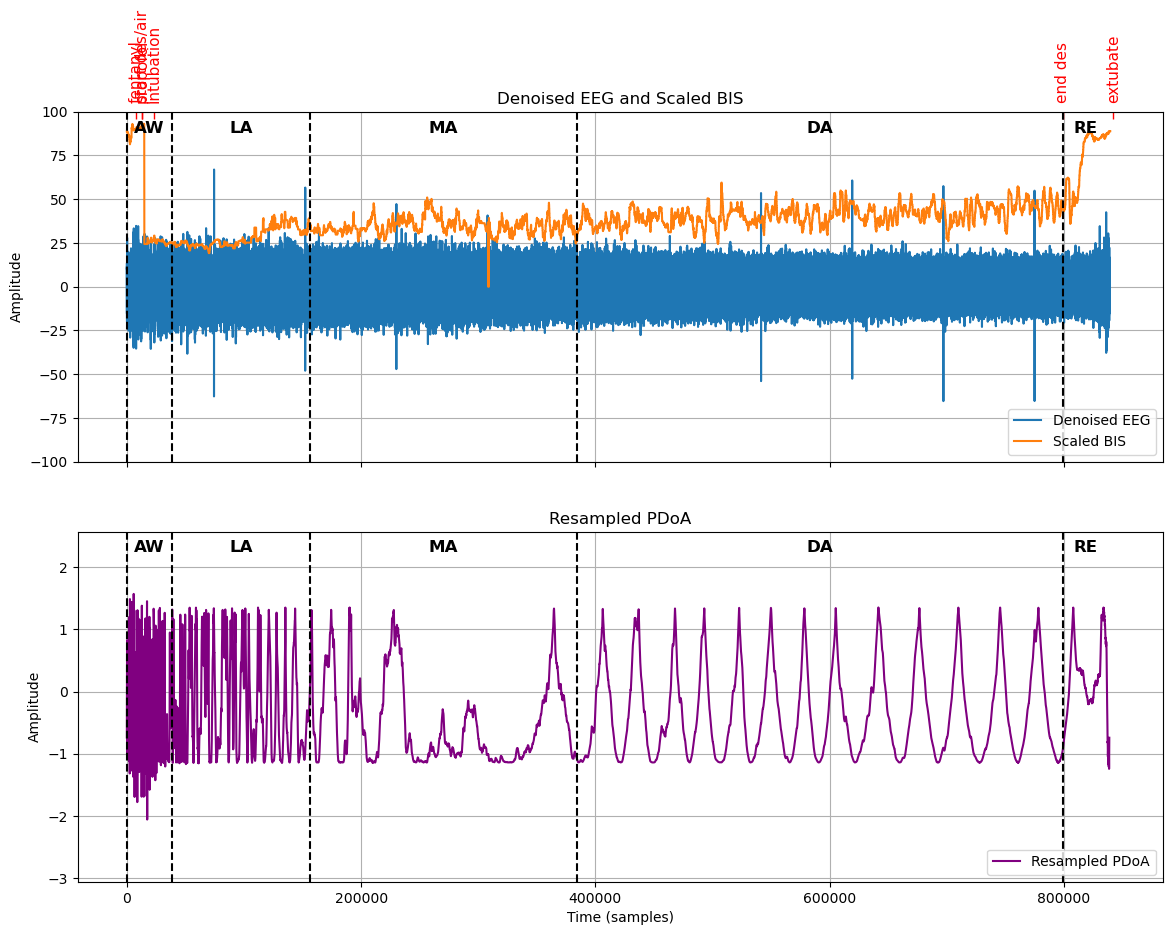

In [114]:
event_times = {
    "fentanyl": "14:32:03",
    "propofol": "14:32:42",
    "start des/air": "14:32:44",
    "intubation": "14:34:00",
    "end des": "16:15:00",
    "extubate": "16:20:38"
}

time_seconds = {}
start_time = "14:31:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05271431, label='Denoised EEG')
axs[0].plot(bis_L05271431, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05271431, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L05271431_label = [
    (0, 38400, 'AW'),
    (38400, 156160, 'LA'),
    (156160, 384000, 'MA'),
    (384000, 798720, 'DA'),
    (798720, eeg_length, 'RE')
]

for start, end, label in L05271431_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L05281010

In [115]:
#EEG
L05281010 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L05281010.mat')

eeg_L05281010 = L05281010['xh']
eeg_L05281010 = pd.DataFrame(eeg_L05281010)
eeg_L05281010 = eeg_L05281010.stack().reset_index(drop = True).to_frame()
eeg_L05281010.columns = ['eeg']

#BIS
bis_L05281010 = np.repeat(bis['BIS_05281010'].dropna().values, 128)

#PDOA
pdoa_L05281010 = pd.read_csv('pdoa/05281010.csv', header = None)
pdoa_L05281010.columns = ['X', 'pdoa']

eeg_length = len(eeg_L05281010)
pdoa_resampled = scipy.signal.resample(pdoa_L05281010['pdoa'], eeg_length)
pdoa_L05281010 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

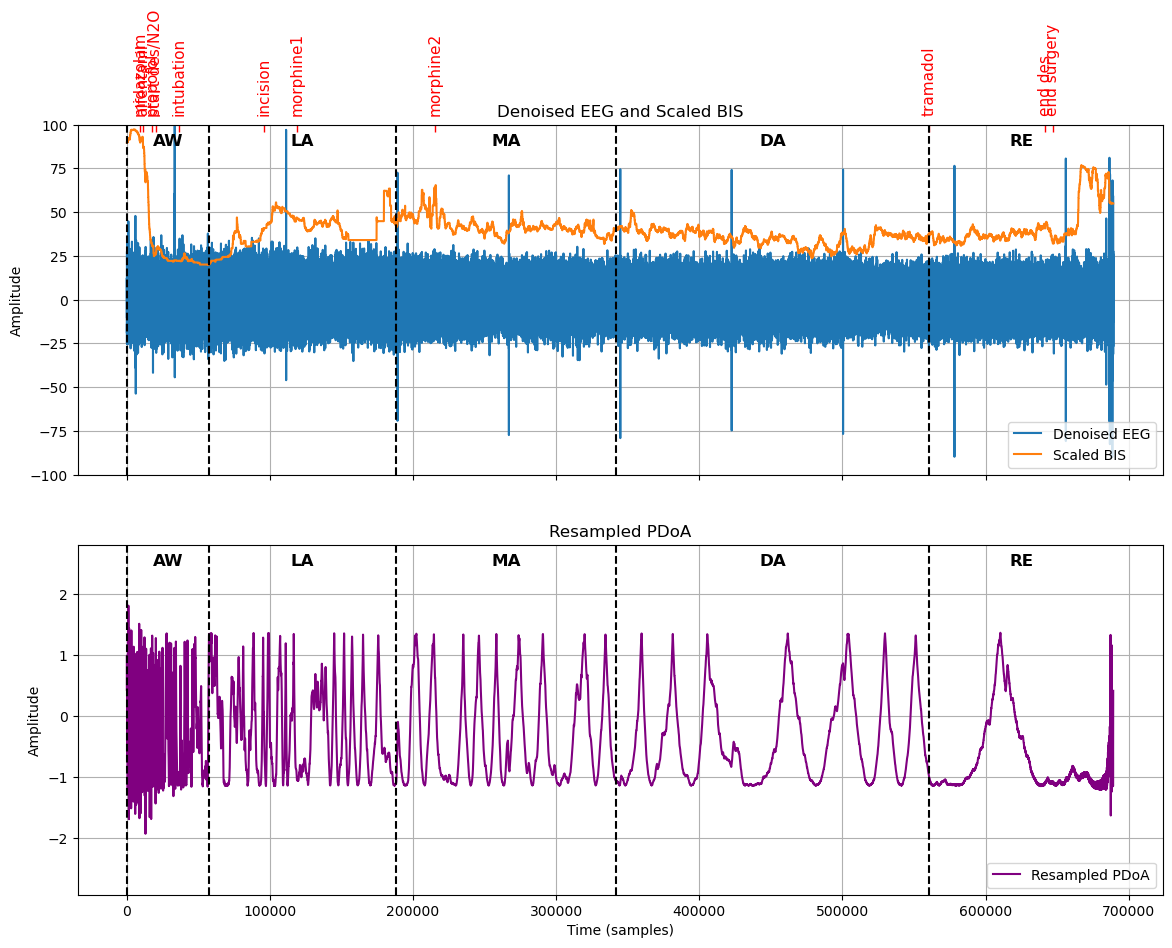

In [118]:
event_times = {
    "midazolam": "10:11:12",
    "alfentanil": "10:11:26",
    "propofol": "10:12:20",
    "start des/N2O": "10:12:38",
    "intubation": "10:14:45",
    "incision": "10:22:28",
    "morphine1": "10:25:30",
    "morphine2": "10:38:02",
    "tramadol": "11:23:00",
    "end des": "11:33:33",
    "end surgery": "11:34:15"
}

time_seconds = {}
start_time = "10:10:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L05281010, label='Denoised EEG')
axs[0].plot(bis_L05281010, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L05281010, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L05281010_label = [
    (0, 57600, 'AW'),
    (57600, 188160, 'LA'),
    (188160, 341760, 'MA'),
    (341760, 560640, 'DA'),
    (560640, eeg_length, 'RE')
]

for start, end, label in L05281010_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06101015

In [119]:
#EEG
L06101015 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06101015.mat')

eeg_L06101015 = L06101015['xh']
eeg_L06101015 = pd.DataFrame(eeg_L06101015)
eeg_L06101015 = eeg_L06101015.stack().reset_index(drop = True).to_frame()
eeg_L06101015.columns = ['eeg']

#BIS
bis_L06101015 = np.repeat(bis['BIS_L06101015'].dropna().values, 128)

#PDOA
pdoa_L06101015 = pd.read_csv('pdoa/06101015.csv', header = None)
pdoa_L06101015.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06101015)
pdoa_resampled = scipy.signal.resample(pdoa_L06101015['pdoa'], eeg_length)
pdoa_L06101015 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

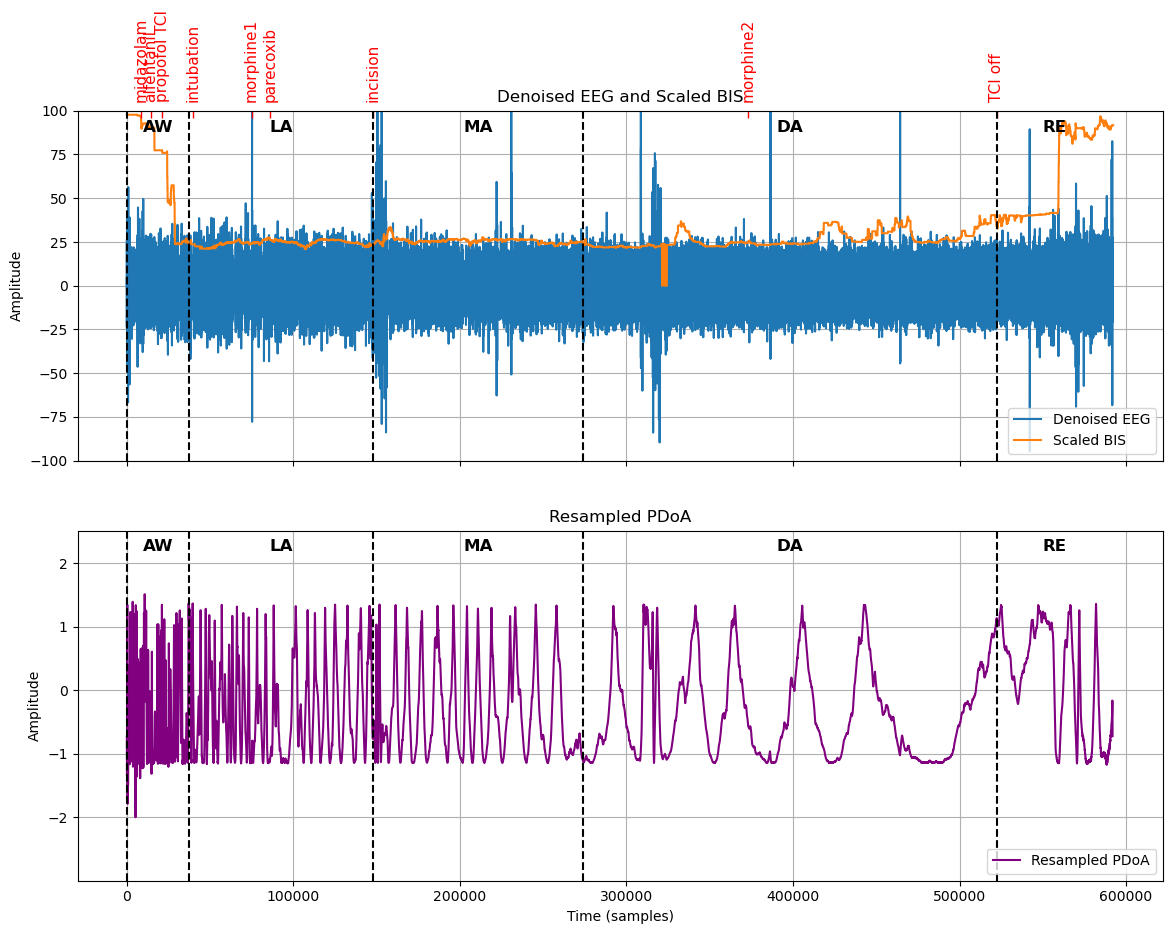

In [125]:
event_times = {
    "midazolam": "10:16:05",
    "alfentanil": "10:16:51",
    "propofol TCI": "10:17:47",
    "intubation": "10:20:08",
    "morphine1": "10:24:45",
    "parecoxib": "10:26:13",
    "incision": "10:34:16",
    "morphine2": "11:03:35",
    "TCI off": "11:23:00"
}

time_seconds = {}
start_time = "10:15:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06101015, label='Denoised EEG')
axs[0].plot(bis_L06101015, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06101015, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06101015_label = [
    (0, 37120, 'AW'),
    (37120, 147968, 'LA'),
    (147968, 273920, 'MA'),
    (273920, 522240, 'DA'),
    (522240, eeg_length, 'RE')
]

for start, end, label in L06101015_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06181302

In [126]:
#EEG
L06181302 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06181302.mat')

eeg_L06181302 = L06181302['xh']
eeg_L06181302 = pd.DataFrame(eeg_L06181302)
eeg_L06181302 = eeg_L06181302.stack().reset_index(drop = True).to_frame()
eeg_L06181302.columns = ['eeg']

#BIS
bis_L06181302 = np.repeat(bis['BIS_L06181302'].dropna().values, 128)

#PDOA
pdoa_L06181302 = pd.read_csv('pdoa/06181302.csv', header = None)
pdoa_L06181302.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06181302)
pdoa_resampled = scipy.signal.resample(pdoa_L06181302['pdoa'], eeg_length)
pdoa_L06181302 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [127]:
#Normalise
pdoa_L06181302['pdoa'] = (pdoa_L06181302['pdoa'] - pdoa_L06181302['pdoa'].mean()) / pdoa_L06181302['pdoa'].std()

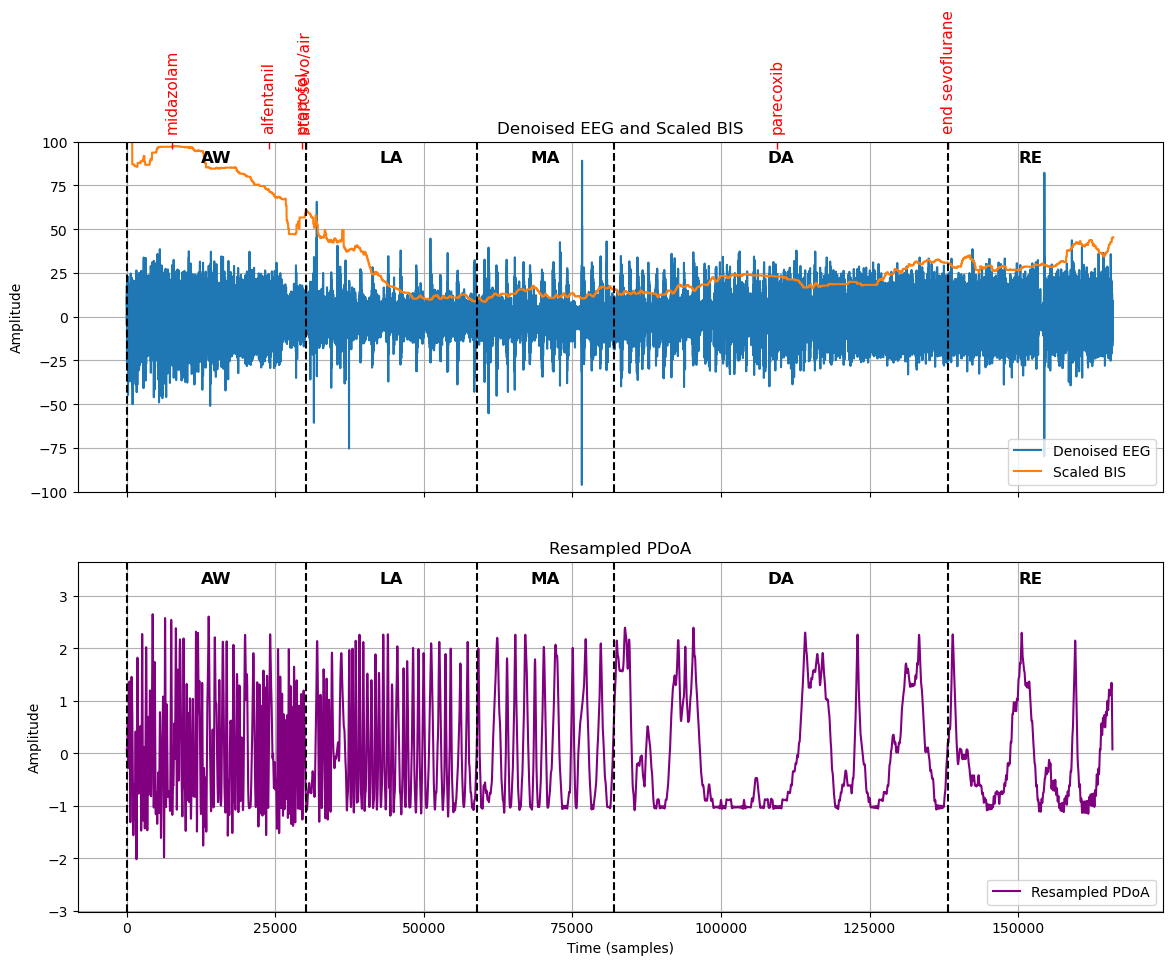

In [130]:
event_times = {
    "midazolam": "13:03:00",
    "alfentanil": "13:05:07",
    "propofol": "13:05:50",
    "start sevo/air": "13:05:55",
    "parecoxib": "13:16:15",
    "end sevoflurane": "13:20:00"
}

time_seconds = {}
start_time = "13:02:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06181302, label='Denoised EEG')
axs[0].plot(bis_L06181302, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06181302, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L06181302) - 1, np.max(pdoa_L06181302) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06181302_label = [
    (0, 30080, 'AW'),
    (30080, 58880, 'LA'),
    (58880, 81920, 'MA'),
    (81920, 138240, 'DA'),
    (138240, eeg_length, 'RE')
]

for start, end, label in L06181302_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06181332

In [131]:
#EEG
L06181332 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06181332.mat')

eeg_L06181332 = L06181332['xh']
eeg_L06181332 = pd.DataFrame(eeg_L06181332)
eeg_L06181332 = eeg_L06181332.stack().reset_index(drop = True).to_frame()
eeg_L06181332.columns = ['eeg']

#BIS
bis_L06181332 = np.repeat(bis['BIS_L06181332'].dropna().values, 128)

#PDOA
pdoa_L06181332 = pd.read_csv('pdoa/06181332.csv', header = None)
pdoa_L06181332.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06181332)
pdoa_resampled = scipy.signal.resample(pdoa_L06181332['pdoa'], eeg_length)
pdoa_L06181332 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [132]:
#Normalise
pdoa_L06181332['pdoa'] = (pdoa_L06181332['pdoa'] - pdoa_L06181332['pdoa'].mean()) / pdoa_L06181332['pdoa'].std()

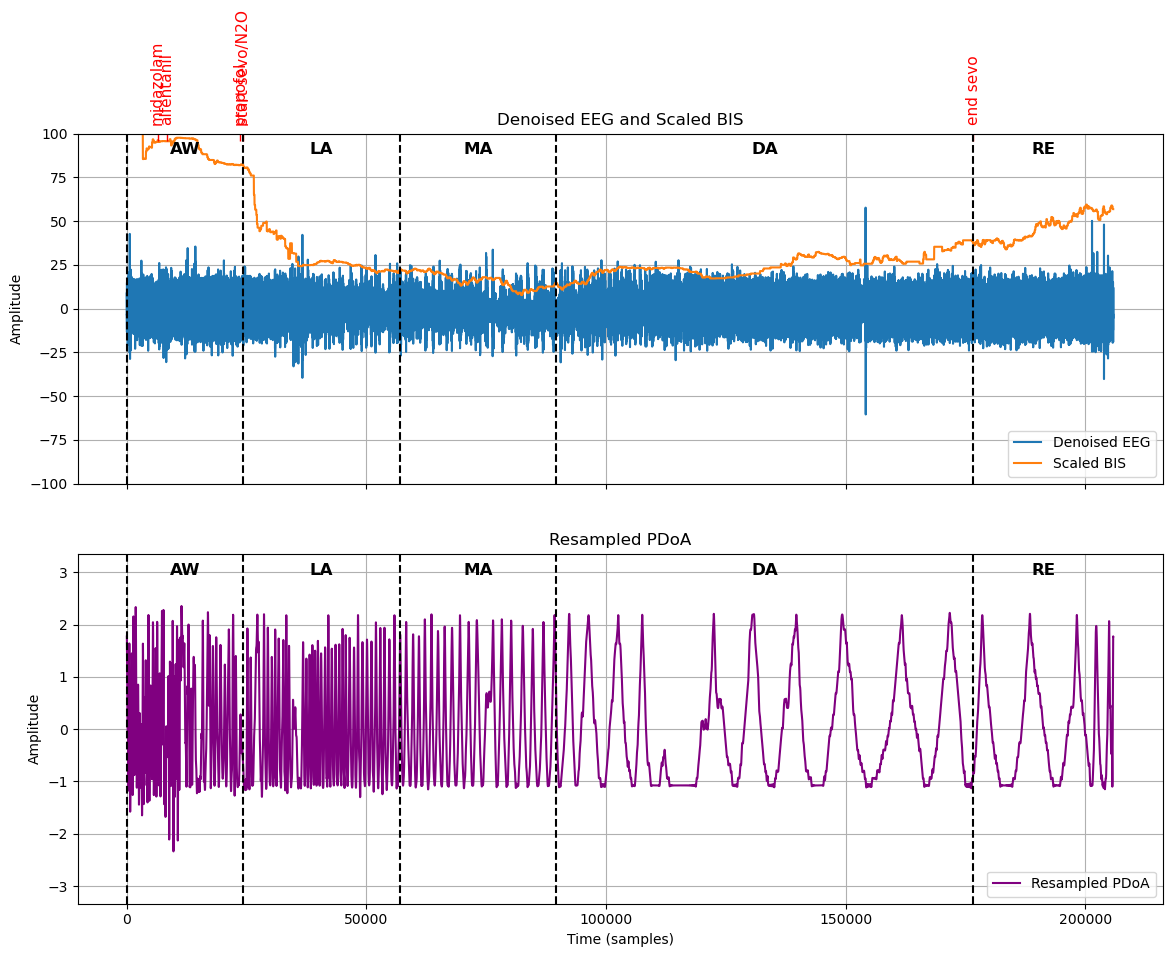

In [134]:
event_times = {
    "midazolam": "13:32:50",
    "alfentanil": "13:33:05",
    "propofol": "13:35:05",
    "start sevo/N2O": "13:35:10",
    "end sevo": "13:55:00"
}

time_seconds = {}
start_time = "13:32:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06181332, label='Denoised EEG')
axs[0].plot(bis_L06181332, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06181332, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L06181332) - 1, np.max(pdoa_L06181332) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06181332_label = [
    (0, 24320, 'AW'),
    (24320, 56960, 'LA'),
    (56960, 89600, 'MA'),
    (89600, 176640, 'DA'),
    (176640, eeg_length, 'RE')
]

for start, end, label in L06181332_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06221009

In [135]:
#EEG
L06221009 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06221009.mat')

eeg_L06221009 = L06221009['xh']
eeg_L06221009 = pd.DataFrame(eeg_L06221009)
eeg_L06221009 = eeg_L06221009.stack().reset_index(drop = True).to_frame()
eeg_L06221009.columns = ['eeg']

#BIS
bis_L06221009 = np.repeat(bis['BISL06221009'].dropna().values, 128)

#PDOA
pdoa_L06221009 = pd.read_csv('pdoa/06221009.csv', header = None)
pdoa_L06221009.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06221009)
pdoa_resampled = scipy.signal.resample(pdoa_L06221009['pdoa'], eeg_length)
pdoa_L06221009 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

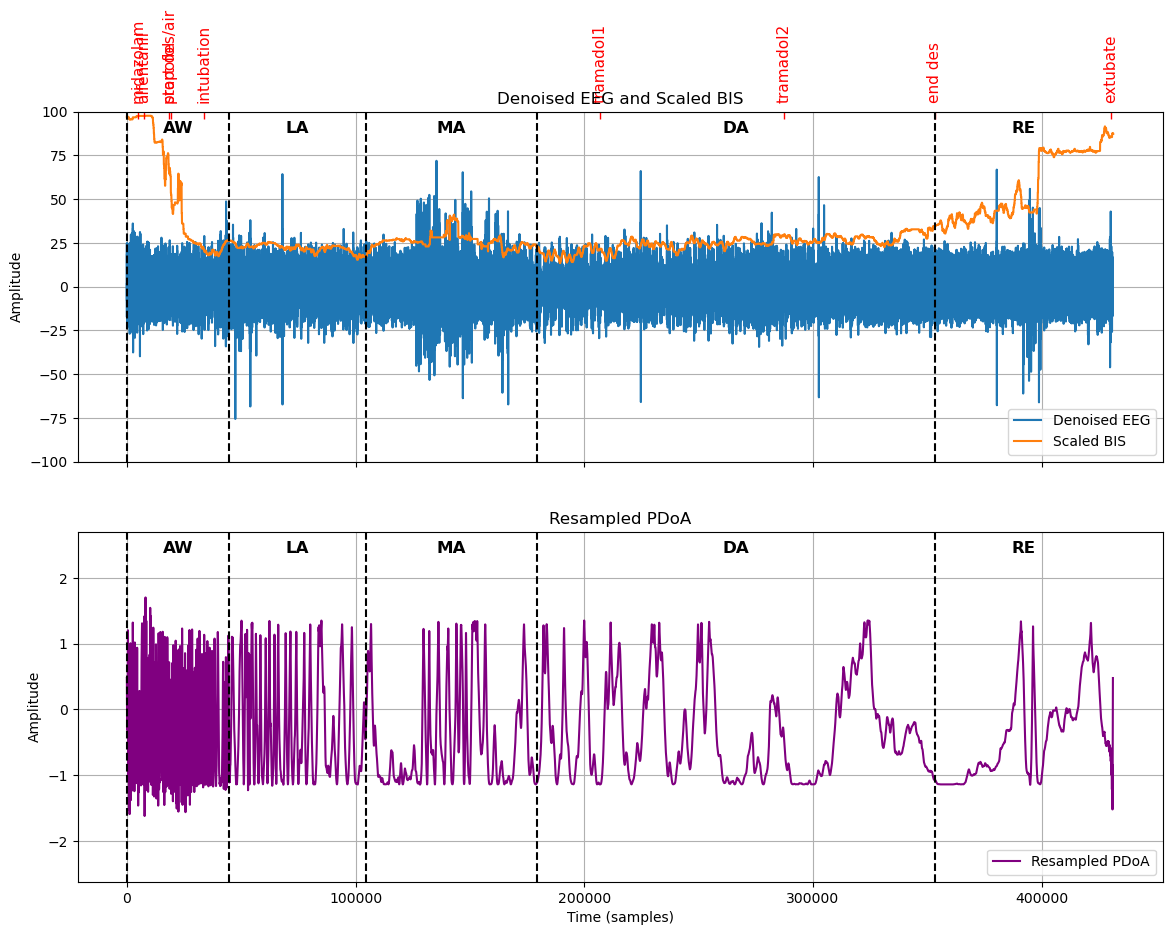

In [137]:
event_times = {
    "midazolam": "10:09:38",
    "alfentanil": "10:09:58",
    "propofol": "10:11:23",
    "start des/air": "10:11:30",
    "intubation": "10:13:24",
    "tramadol1": "10:35:55",
    "tramadol2": "10:46:25",
    "end des": "10:55:00",
    "extubate": "11:05:00"
}

time_seconds = {}
start_time = "10:09:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06221009, label='Denoised EEG')
axs[0].plot(bis_L06221009, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06221009, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06221009_label = [
    (0, 44800, 'AW'),
    (44800, 104500, 'LA'),
    (104500, 179200, 'MA'),
    (179200, 353280, 'DA'),
    (353280, eeg_length, 'RE')
]

for start, end, label in L06221009_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06221141

In [138]:
#EEG
L06221141 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06221141.mat')

eeg_L06221141 = L06221141['xh']
eeg_L06221141 = pd.DataFrame(eeg_L06221141)
eeg_L06221141 = eeg_L06221141.stack().reset_index(drop = True).to_frame()
eeg_L06221141.columns = ['eeg']

#BIS
bis_L06221141 = np.repeat(bis['BIS_L06221141'].dropna().values, 128)

#PDOA
pdoa_L06221141 = pd.read_csv('pdoa/06221141.csv', header = None)
pdoa_L06221141.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06221141)
pdoa_resampled = scipy.signal.resample(pdoa_L06221141['pdoa'], eeg_length)
pdoa_L06221141 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

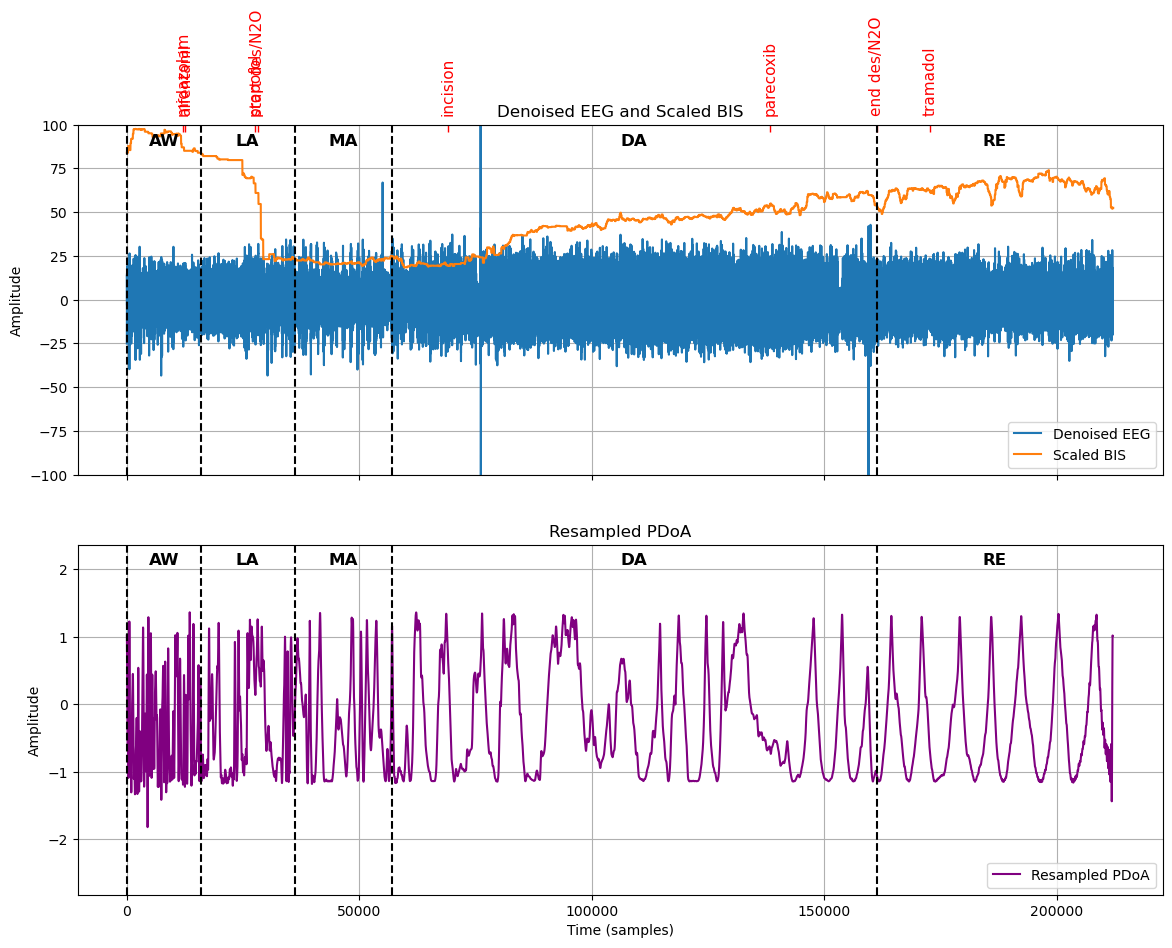

In [140]:
event_times = {
    "midazolam": "11:42:35",
    "alfentanil": "11:42:38",
    "propofol": "11:44:35",
    "start des/N2O": "11:44:40",
    "incision": "11:50:00",
    "parecoxib": "11:59:00",
    "end des/N2O": "12:02:00",
    "tramadol": "12:03:30"
}

time_seconds = {}
start_time = "11:41:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06221141, label='Denoised EEG')
axs[0].plot(bis_L06221141, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06221141, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06221141_label = [
    (0, 15872, 'AW'),
    (15872, 36096, 'LA'),
    (36096, 56960, 'MA'),
    (56960, 161280, 'DA'),
    (161280, eeg_length, 'RE')
]

for start, end, label in L06221141_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L06221219

In [141]:
#EEG
L06221219 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L06221219.mat')

eeg_L06221219 = L06221219['xh']
eeg_L06221219 = pd.DataFrame(eeg_L06221219)
eeg_L06221219 = eeg_L06221219.stack().reset_index(drop = True).to_frame()
eeg_L06221219.columns = ['eeg']

#BIS
bis_L06221219 = np.repeat(bis['BIS_L06221219'].dropna().values, 128)

#PDOA
pdoa_L06221219 = pd.read_csv('pdoa/06221219.csv', header = None)
pdoa_L06221219.columns = ['X', 'pdoa']

eeg_length = len(eeg_L06221219)
pdoa_resampled = scipy.signal.resample(pdoa_L06221219['pdoa'], eeg_length)
pdoa_L06221219 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

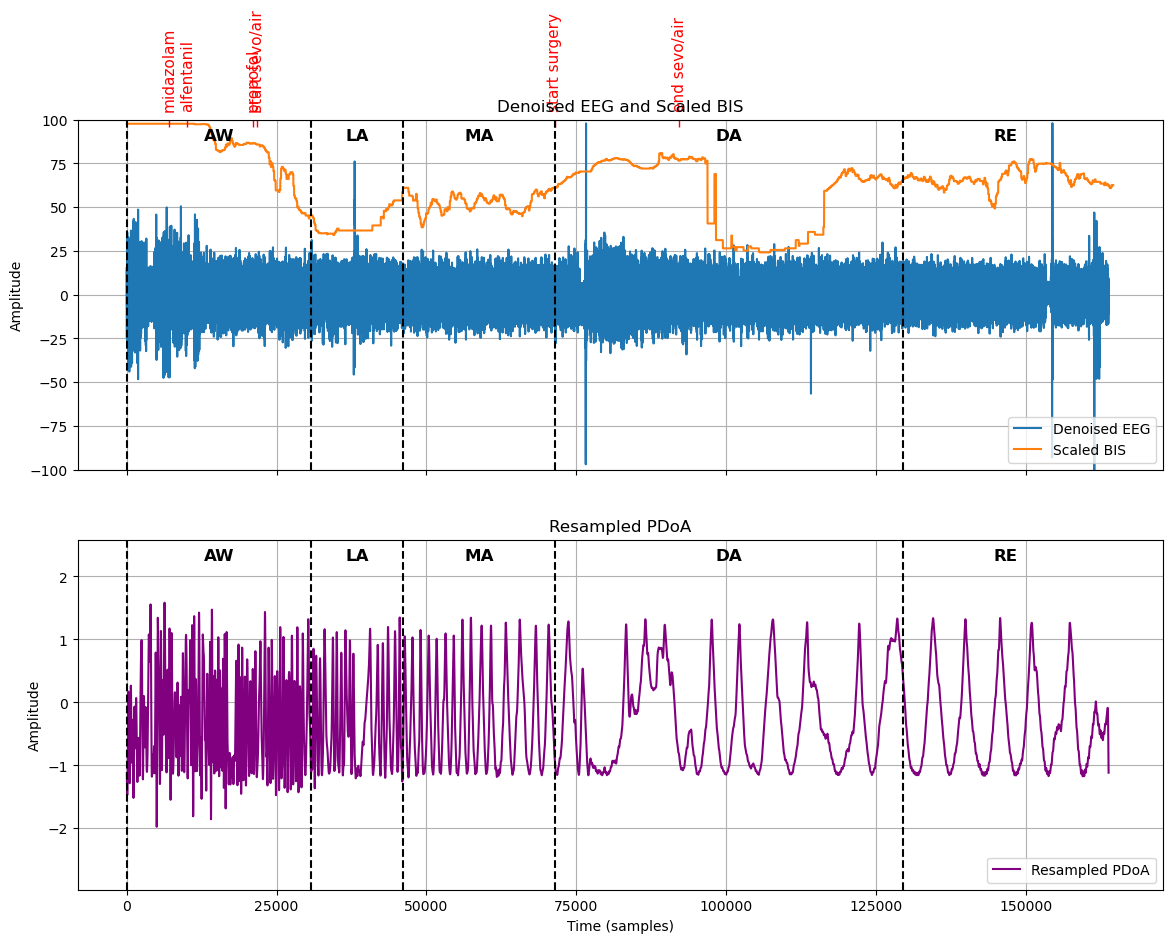

In [143]:
event_times = {
    "midazolam": "12:19:55",
    "alfentanil": "12:20:19",
    "propofol": "12:21:45",
    "start sevo/air": "12:21:50",
    "start surgery": "12:28:18",
    "end sevo/air": "12:31:00"
}

time_seconds = {}
start_time = "12:19:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L06221219, label='Denoised EEG')
axs[0].plot(bis_L06221219, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L06221219, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L06221219_label = [
    (0, 30720, 'AW'),
    (30720, 46080, 'LA'),
    (46080, 71424, 'MA'), #time start surgery
    (71424, 129536, 'DA'),
    (129536, eeg_length, 'RE')
]

for start, end, label in L06221219_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L08181442

In [144]:
#EEG
L08181442 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L08181442.mat')

eeg_L08181442 = L08181442['xh']
eeg_L08181442 = pd.DataFrame(eeg_L08181442)
eeg_L08181442 = eeg_L08181442.stack().reset_index(drop = True).to_frame()
eeg_L08181442.columns = ['eeg']

#BIS
bis_L08181442 = np.repeat(bis['BIS_L08181442'].dropna().values, 128)

#PDOA
pdoa_L08181442 = pd.read_csv('pdoa/08181442.csv', header = None)
pdoa_L08181442.columns = ['X', 'pdoa']

eeg_length = len(eeg_L08181442)
pdoa_resampled = scipy.signal.resample(pdoa_L08181442['pdoa'], eeg_length)
pdoa_L08181442 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [145]:
#Normalise
pdoa_L08181442['pdoa'] = (pdoa_L08181442['pdoa'] - pdoa_L08181442['pdoa'].mean()) / pdoa_L08181442['pdoa'].std()

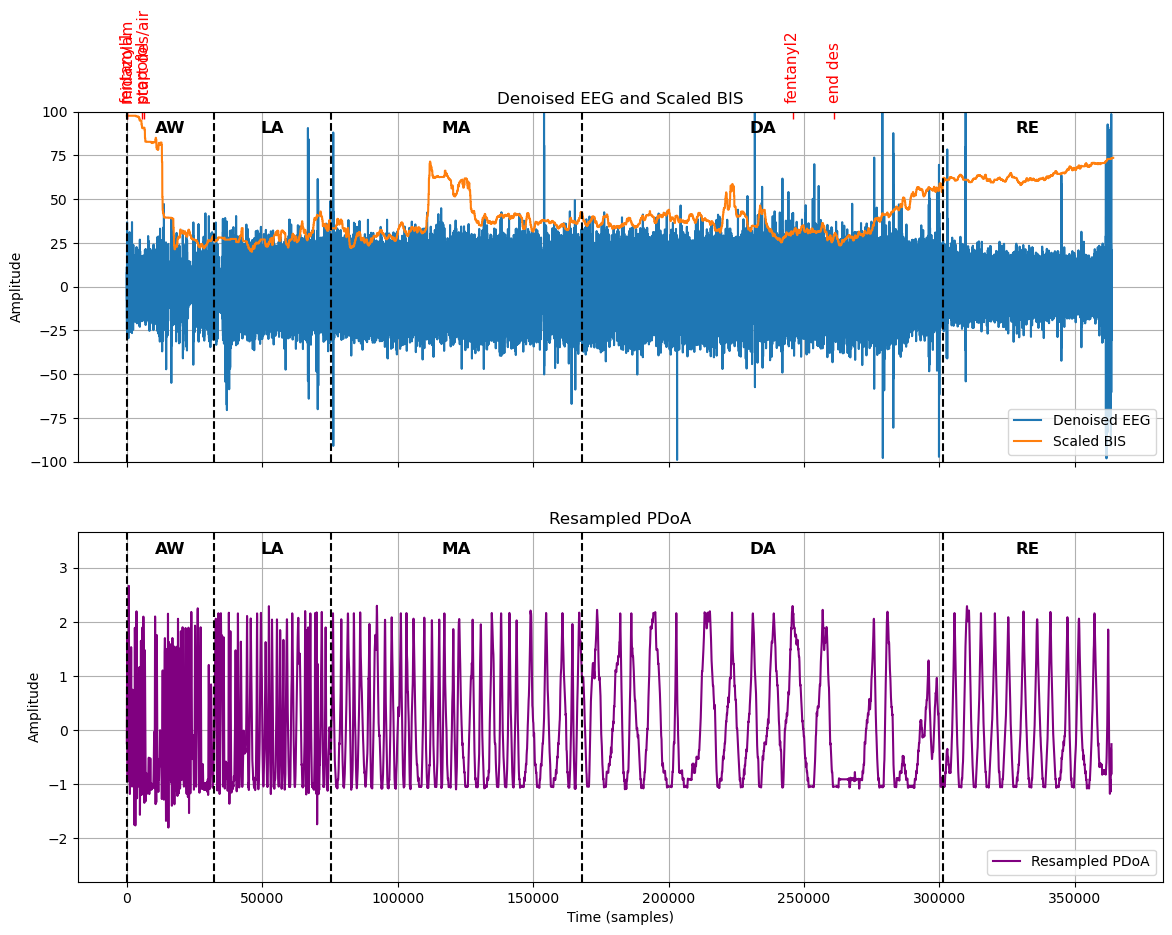

In [146]:
event_times = {
    "midazolam": "14:43:00",
    "fentanyl1": "14:43:00",
    "propofol": "14:43:45",
    "start des/air": "14:43:50",
    "fentanyl2": "15:15:00",
    "end des": "15:17:00"
}

time_seconds = {}
start_time = "14:43:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L08181442, label='Denoised EEG')
axs[0].plot(bis_L08181442, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L08181442, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L08181442) - 1, np.max(pdoa_L08181442) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L08181442_label = [
    (0, 32000, 'AW'),
    (32000, 75520, 'LA'),
    (75520, 168000, 'MA'),
    (168000, 301500, 'DA'),
    (301500, eeg_length, 'RE')
]

for start, end, label in L08181442_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L08190811

In [147]:
#EEG
L08190811 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L08190811.mat')

eeg_L08190811 = L08190811['xh']
eeg_L08190811 = pd.DataFrame(eeg_L08190811)
eeg_L08190811 = eeg_L08190811.stack().reset_index(drop = True).to_frame()
eeg_L08190811.columns = ['eeg']

#BIS
bis_L08190811 = np.repeat(bis['BIS_L08190811'].dropna().values, 128)

#PDOA
pdoa_L08190811 = pd.read_csv('pdoa/08190811.csv', header = None)
pdoa_L08190811.columns = ['X', 'pdoa']

eeg_length = len(eeg_L08190811)
pdoa_resampled = scipy.signal.resample(pdoa_L08190811['pdoa'], eeg_length)
pdoa_L08190811 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

In [148]:
#Normalise
pdoa_L08190811['pdoa'] = (pdoa_L08190811['pdoa'] - pdoa_L08190811['pdoa'].mean()) / pdoa_L08190811['pdoa'].std()

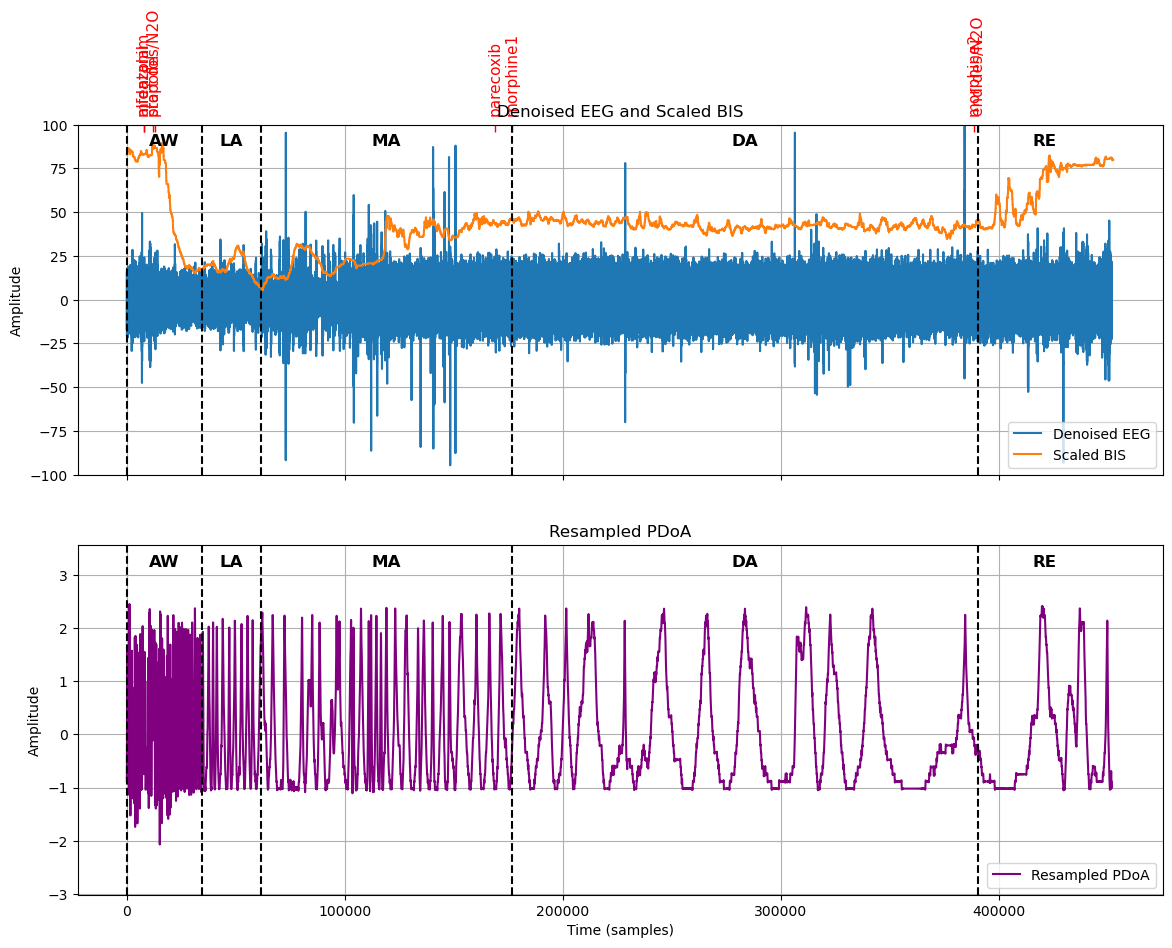

In [151]:
event_times = {
    "midazolam": "08:12:00",
    "alfentanil": "08:12:00",
    "propofol": "08:12:35",
    "start des/N2O": "08:12:40",
    "parecoxib": "08:33:00",
    "morphine1": "08:34:00",
    "morphine2": "09:01:35",
    "end des/N2O": "09:01:50"
}

time_seconds = {}
start_time = "08:11:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L08190811, label='Denoised EEG')
axs[0].plot(bis_L08190811, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L08190811, label='Resampled PDoA', color='purple')
axs[1].set_ylim(np.min(pdoa_L05211742) - 1, np.max(pdoa_L05211742) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L08190811_label = [
    (0, 34560, 'AW'),
    (34560, 61440, 'LA'),
    (61440, 176640, 'MA'),
    (176640, 390400, 'DA'),
    (390400, eeg_length, 'RE')
]

for start, end, label in L08190811_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()

### L08190921

In [152]:
#EEG
L08190921 = scipy.io.loadmat('denoise EEG/denoiseEEGsignal_L08190921.mat')

eeg_L08190921 = L08190921['xh']
eeg_L08190921 = pd.DataFrame(eeg_L08190921)
eeg_L08190921 = eeg_L08190921.stack().reset_index(drop = True).to_frame()
eeg_L08190921.columns = ['eeg']

#BIS
bis_L08190921 = np.repeat(bis['BIS_L08190921'].dropna().values, 128)

#PDOA
pdoa_L08190921 = pd.read_csv('pdoa/08190921.csv', header = None)
pdoa_L08190921.columns = ['X', 'pdoa']

eeg_length = len(eeg_L08190921)
pdoa_resampled = scipy.signal.resample(pdoa_L08190921['pdoa'], eeg_length)
pdoa_L08190921 = pd.DataFrame(pdoa_resampled, columns=['pdoa'])

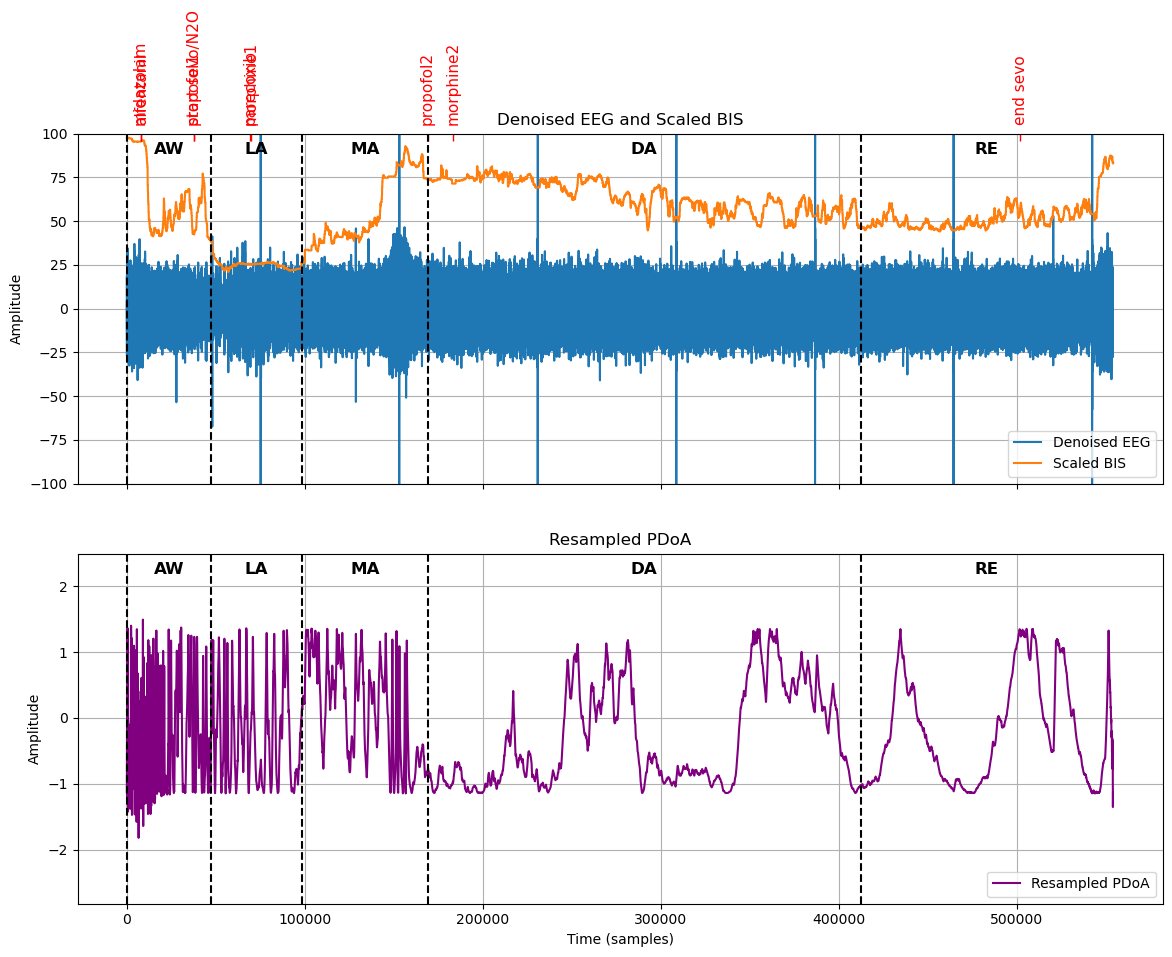

In [155]:
event_times = {
    "midazolam": "09:22:00",
    "alfentanil": "09:22:03",
    "propofol1": "09:25:53",
    "start sevo/N2O": "09:25:55",
    "parecoxib": "09:30:00",
    "morphine1": "09:30:05",
    "propofol2": "09:43:00",
    "morphine2": "09:44:50",
    "end sevo": "10:26:20"
}

time_seconds = {}
start_time = "09:21:00" 
start_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(start_time.split(":"))))
for event, time in event_times.items():
    event_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(time.split(":"))))
    time_seconds[event] = (event_seconds - start_seconds) * 128

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the EEG and BIS signals in the first subplot
axs[0].plot(eeg_L08190921, label='Denoised EEG')
axs[0].plot(bis_L08190921, label='Scaled BIS')
axs[0].set_ylim(-100, 100)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Denoised EEG and Scaled BIS')
axs[0].legend(loc='lower right')
axs[0].grid(True)

for event, seconds in time_seconds.items():
    axs[0].plot(seconds, axs[0].get_ylim()[1], marker='|', color='red', markersize=10, linestyle='None')
    axs[0].text(seconds, axs[0].get_ylim()[1] * 1.05, event,
             rotation=90, va='bottom', ha='center', color='red', fontsize=11)

axs[1].plot(pdoa_L08190921, label='Resampled PDoA', color='purple')
axs[1].set_ylim(min(pdoa_resampled) - 1, max(pdoa_resampled) + 1)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resampled PDoA')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Resampled PDoA')
plt.legend(loc='lower right')
plt.grid(True)

L08190921_label = [
    (0, 47000, 'AW'),
    (47000, 98560, 'LA'),
    (98560, 168960, 'MA'),
    (168960, 412160, 'DA'),
    (412160, eeg_length, 'RE')
]

for start, end, label in L08190921_label:
    axs[0].axvline(x=start, color='black', linestyle='--')
    axs[0].text((start + end) / 2, axs[0].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    axs[1].axvline(x=start, color='black', linestyle='--')
    axs[1].text((start + end) / 2, axs[1].get_ylim()[1] * 0.95, label,
                rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')
    
plt.show()